# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls

In [3]:
print('Beginning Data Retrieval\n-----------------------------')

record = 0
city_list = []
country_list = []
lat_list = []
lng_list = []
date_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []

for city in cities:
    response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}')
    if(str(response) == '<Response [200]>'):
        record += 1
        print(f"Processing Record {record} | {response.json()['name']}")
        city_list.append(response.json()['name'])
        country_list.append(response.json()['sys']['country'])
        lat_list.append(response.json()['coord']['lat'])
        lng_list.append(response.json()['coord']['lon'])
        date_list.append(response.json()['dt'])
        maxtemp_list.append(response.json()['main']['temp_max'])
        humidity_list.append(response.json()['main']['humidity'])
        cloudiness_list.append(response.json()['clouds']['all'])
        windspeed_list.append(response.json()['wind']['speed'])
    else:
        print('City not found. Skipping...')
    time.sleep(1)
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Cape Town
Processing Record 2 | Mirnyy
Processing Record 3 | Saint George
Processing Record 4 | Bredasdorp
City not found. Skipping...
Processing Record 5 | Ushuaia
Processing Record 6 | Rikitea
Processing Record 7 | Bo Phloi
Processing Record 8 | Upernavik
Processing Record 9 | Atuona
Processing Record 10 | Lipari
City not found. Skipping...
Processing Record 11 | Albany
Processing Record 12 | Colac
Processing Record 13 | Riyadh
Processing Record 14 | Busselton
Processing Record 15 | Jacareacanga
City not found. Skipping...
Processing Record 16 | San Andres
Processing Record 17 | Namatanai
Processing Record 18 | Hurricane
Processing Record 19 | Ambilobe
Processing Record 20 | Portland
Processing Record 21 | Kargil
Processing Record 22 | Vaini
Processing Record 23 | Calvillo
Processing Record 24 | Mount Isa
Processing Record 25 | Mehamn
Processing Record 26 | Haines Junction
Processing Record 27 | Lavrentiya
C

Processing Record 223 | Tulum
Processing Record 224 | Zhangye
Processing Record 225 | Cap Malheureux
Processing Record 226 | Mahebourg
Processing Record 227 | Pangnirtung
Processing Record 228 | Belluru
Processing Record 229 | Hofn
Processing Record 230 | Port Keats
Processing Record 231 | Lorengau
Processing Record 232 | Pochutla
Processing Record 233 | Vilhena
Processing Record 234 | Newport
Processing Record 235 | Hamilton
Processing Record 236 | Comarapa
Processing Record 237 | Derzhavinsk
City not found. Skipping...
Processing Record 238 | Pacific Grove
Processing Record 239 | Palmer
Processing Record 240 | Vimperk
Processing Record 241 | Bubaque
City not found. Skipping...
Processing Record 242 | Agapovka
Processing Record 243 | Broome
Processing Record 244 | Tyrma
Processing Record 245 | Meulaboh
Processing Record 246 | Nanakuli
Processing Record 247 | Port Elizabeth
Processing Record 248 | Axim
Processing Record 249 | Vila Franca do Campo
Processing Record 250 | Laguna
Processi

Processing Record 446 | Normandin
Processing Record 447 | Lichuan
Processing Record 448 | Touros
Processing Record 449 | Altamira
Processing Record 450 | Saint-Augustin
Processing Record 451 | Jumla
Processing Record 452 | Paka
Processing Record 453 | Jalingo
Processing Record 454 | Naryan-Mar
Processing Record 455 | Leshukonskoye
Processing Record 456 | Talnakh
Processing Record 457 | Hami
Processing Record 458 | Port Moresby
Processing Record 459 | Ukiah
Processing Record 460 | Matara
Processing Record 461 | Sungairaya
Processing Record 462 | Kahului
Processing Record 463 | Kumluca
Processing Record 464 | Buala
Processing Record 465 | Manzanillo
Processing Record 466 | Hibbing
Processing Record 467 | Vanimo
Processing Record 468 | Kalyazin
Processing Record 469 | Biak
Processing Record 470 | Bucerias
Processing Record 471 | Zyryanka
Processing Record 472 | Port Hardy
Processing Record 473 | Arvika
City not found. Skipping...
Processing Record 474 | Khorixas
Processing Record 475 | Ba

### Convert Raw Data to DataFrame

In [4]:
weather_df = pd.DataFrame({'City':city_list,
                           'Country':country_list,
                           'Lat':lat_list,
                           'Lng':lng_list,
                           'Date':date_list,
                           'Max Temp':maxtemp_list,
                           'Humidity':humidity_list,
                           'Cloudiness':cloudiness_list,
                           'Wind Speed':windspeed_list})

In [5]:
weather_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,-33.93,18.42,1569346383,68.00,59,20,18.34
1,Mirnyy,RU,56.57,36.46,1569346457,34.64,91,71,4.59
2,Saint George,GR,39.45,22.34,1569346458,71.60,83,75,5.82
3,Bredasdorp,ZA,-34.53,20.04,1569346459,62.60,59,50,16.11
4,Ushuaia,AR,-54.81,-68.31,1569346461,53.60,57,40,36.91


In [6]:
weather_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data

#### Latitude vs. Temperature Plot

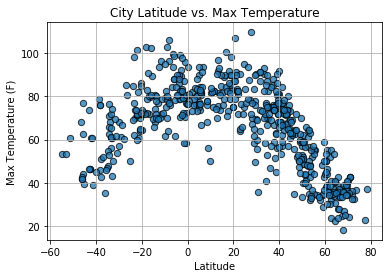

In [7]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('output_data/lat_vs_maxtemp.png')

plt.show()

#### Latitude vs. Humidity Plot

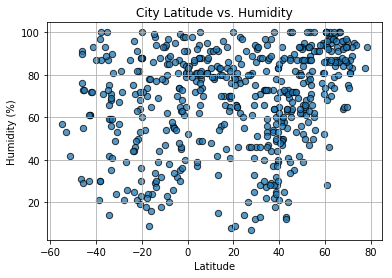

In [8]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('output_data/lat_vs_humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

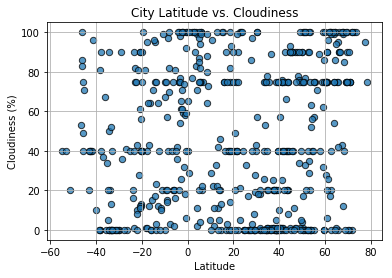

In [9]:
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('output_data/lat_vs_cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

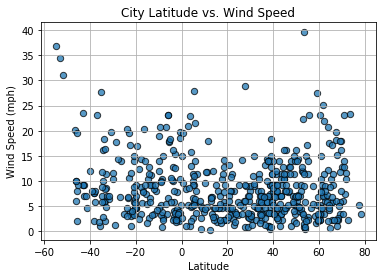

In [10]:
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=40, edgecolors='k', alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('output_data/lat_vs_windspeed.png')

plt.show()

## Linear Regression

In [11]:
northern_df = weather_df.loc[weather_df['Lat'] >= 0].reset_index(drop=True)
southern_df = weather_df.loc[weather_df['Lat'] < 0].reset_index(drop=True)

In [12]:
northern_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mirnyy,RU,56.57,36.46,1569346457,34.64,91,71,4.59
1,Saint George,GR,39.45,22.34,1569346458,71.60,83,75,5.82
2,Bo Phloi,TH,14.32,99.52,1569346463,73.70,80,46,4.63
3,Upernavik,GL,72.79,-56.15,1569346465,32.84,95,100,2.30
4,Lipari,IT,38.47,14.95,1569346467,75.99,78,75,6.93


In [13]:
southern_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,-33.93,18.42,1569346383,68.00,59,20,18.34
1,Bredasdorp,ZA,-34.53,20.04,1569346459,62.60,59,50,16.11
2,Ushuaia,AR,-54.81,-68.31,1569346461,53.60,57,40,36.91
3,Rikitea,PF,-23.12,-134.97,1569346400,69.74,71,82,10.58
4,Atuona,PF,-9.80,-139.03,1569346384,79.28,77,0,18.99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared: -0.8064757707400176
Regression Line: y = -0.8x + 94.52


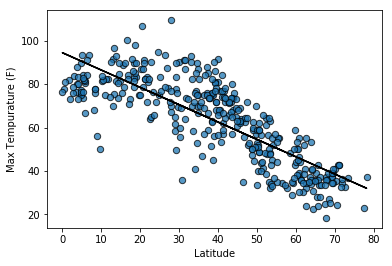

In [14]:
northern_df.plot(kind='scatter', x='Lat', y='Max Temp', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')

(northtemp_slope, northtemp_intercept, northtemp_r, northtemp_p, northtemp_stderr) = linregress(northern_df['Lat'], northern_df['Max Temp'])
northtemp_regress = northern_df['Lat'] * northtemp_slope + northtemp_intercept
plt.plot(northern_df['Lat'], northtemp_regress, color='k')

print(f'R-Squared: {northtemp_r}')
print(f'Regression Line: y = {round(northtemp_slope, 2)}x + {round(northtemp_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared: 0.6665133612121541
Regression Line: y = 0.71x + 86.48


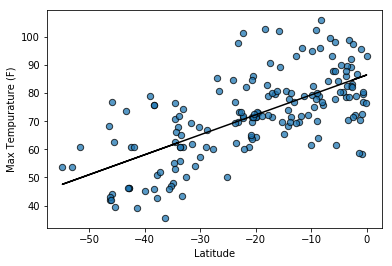

In [15]:
southern_df.plot(kind='scatter', x='Lat', y='Max Temp', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')

(southtemp_slope, southtemp_intercept, southtemp_r, southtemp_p, southtemp_stderr) = linregress(southern_df['Lat'], southern_df['Max Temp'])
southtemp_regress = southern_df['Lat'] * southtemp_slope + southtemp_intercept
plt.plot(southern_df['Lat'], southtemp_regress, color='k')

print(f'R-Squared: {southtemp_r}')
print(f'Regression Line: y = {round(southtemp_slope, 2)}x + {round(southtemp_intercept, 2)}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared: 0.19755528263612568
Regression Line: y = 0.22x + 62.32


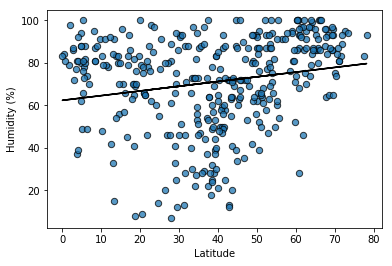

In [16]:
northern_df.plot(kind='scatter', x='Lat', y='Humidity', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(northtemp_slope, northtemp_intercept, northtemp_r, northtemp_p, northtemp_stderr) = linregress(northern_df['Lat'], northern_df['Humidity'])
northtemp_regress = northern_df['Lat'] * northtemp_slope + northtemp_intercept
plt.plot(northern_df['Lat'], northtemp_regress, color='k')

print(f'R-Squared: {northtemp_r}')
print(f'Regression Line: y = {round(northtemp_slope, 2)}x + {round(northtemp_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared: 0.04575425697663327
Regression Line: y = 0.08x + 63.65


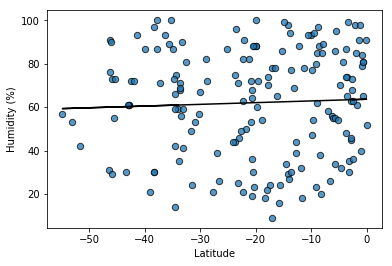

In [17]:
southern_df.plot(kind='scatter', x='Lat', y='Humidity', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(southtemp_slope, southtemp_intercept, southtemp_r, southtemp_p, southtemp_stderr) = linregress(southern_df['Lat'], southern_df['Humidity'])
southtemp_regress = southern_df['Lat'] * southtemp_slope + southtemp_intercept
plt.plot(southern_df['Lat'], southtemp_regress, color='k')

print(f'R-Squared: {southtemp_r}')
print(f'Regression Line: y = {round(southtemp_slope, 2)}x + {round(southtemp_intercept, 2)}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared: 0.10324638413200742
Regression Line: y = 0.2x + 39.5


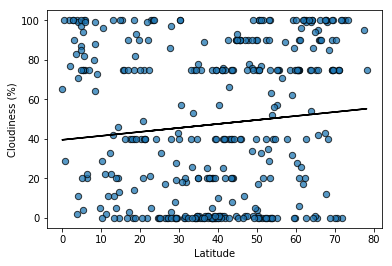

In [18]:
northern_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(northtemp_slope, northtemp_intercept, northtemp_r, northtemp_p, northtemp_stderr) = linregress(northern_df['Lat'], northern_df['Cloudiness'])
northtemp_regress = northern_df['Lat'] * northtemp_slope + northtemp_intercept
plt.plot(northern_df['Lat'], northtemp_regress, color='k')

print(f'R-Squared: {northtemp_r}')
print(f'Regression Line: y = {round(northtemp_slope, 2)}x + {round(northtemp_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared: 0.21191507373004043
Regression Line: y = 0.5x + 53.48


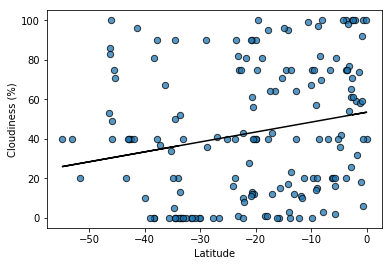

In [19]:
southern_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(southtemp_slope, southtemp_intercept, southtemp_r, southtemp_p, southtemp_stderr) = linregress(southern_df['Lat'], southern_df['Cloudiness'])
southtemp_regress = southern_df['Lat'] * southtemp_slope + southtemp_intercept
plt.plot(southern_df['Lat'], southtemp_regress, color='k')

print(f'R-Squared: {southtemp_r}')
print(f'Regression Line: y = {round(southtemp_slope, 2)}x + {round(southtemp_intercept, 2)}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared: 0.09792640667358825
Regression Line: y = 0.03x + 6.62


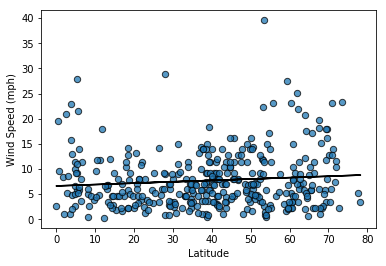

In [20]:
northern_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(northtemp_slope, northtemp_intercept, northtemp_r, northtemp_p, northtemp_stderr) = linregress(northern_df['Lat'], northern_df['Wind Speed'])
northtemp_regress = northern_df['Lat'] * northtemp_slope + northtemp_intercept
plt.plot(northern_df['Lat'], northtemp_regress, color='k')

print(f'R-Squared: {northtemp_r}')
print(f'Regression Line: y = {round(northtemp_slope, 2)}x + {round(northtemp_intercept, 2)}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared: -0.21506492194723534
Regression Line: y = -0.1x + 7.33


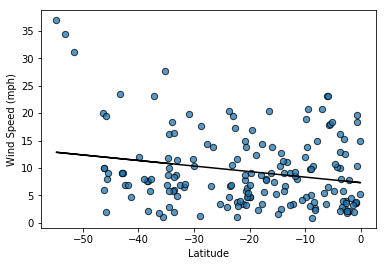

In [21]:
southern_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=40, edgecolors='k', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(southtemp_slope, southtemp_intercept, southtemp_r, southtemp_p, southtemp_stderr) = linregress(southern_df['Lat'], southern_df['Wind Speed'])
southtemp_regress = southern_df['Lat'] * southtemp_slope + southtemp_intercept
plt.plot(southern_df['Lat'], southtemp_regress, color='k')

print(f'R-Squared: {southtemp_r}')
print(f'Regression Line: y = {round(southtemp_slope, 2)}x + {round(southtemp_intercept, 2)}')
plt.show()